In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
!pip install tensorflow


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 2.1 MB/s eta 0:02:37
   ---------------------------------------- 1.3/332.0 MB 2.3 MB/s eta 0:02:22
   ---------------------------------------- 1.8/332.0 MB 2.6 MB/s eta 0:02:06
   ---------------------------------------- 2.1/332.0 MB 2.6 MB/s eta 0:02:08
   ---------------------------------------- 2.4/332.0 MB 1.9 MB/s eta 0:02:51
   ---------------------------------------- 3.1/332.0 MB 2.2 MB/s eta 0:02:30
   ---------------------------------------- 3.9/332.0 MB 2.5 MB/s eta 0:02:14
    --------------------------------------- 4.2/332.0 MB 2.5 MB/s eta 0:02:10
    --------------------------------------- 4.7/332.0 MB 2.3 MB/s eta 0:02:20
    --------------------------------------- 5.5/332.0 MB 2.5 MB/s eta 0:02:12
    --------------------------------------- 6.3/332.0 MB 2.6 MB/s eta 0:02:06


In [8]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,Input

In [11]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 215.8 kB/s eta 0:02:59
    --------------------------------------- 0.8/39.0 MB 346.9 kB/s eta 0:01:51
    --------------------------------------- 0.8/39.0 MB 346.9 kB/s eta 0:01:51
    --------------------------------------- 0.8/39.0 MB 346.9 kB/s eta 0:01:51
    --------------------------------------- 0.8/39.0 M

In [12]:
path = r"C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UTKFace"


In [13]:
image_paths=[]
age_labels=[]
gender_labels=[]

In [21]:
import cv2

In [23]:
for filename in tqdm(os.listdir(path)):
    img_path = os.path.join(path, filename)
    img = cv2.imread(img_path)
    temp=filename.split('_')
    age=int(temp[0])
    gender=int(temp[1])
    image_paths.append(img_path)
    age_labels.append(age)
    gender_labels.append(gender)
    
    

  0%|          | 0/23708 [00:00<?, ?it/s]

In [24]:
#convert to data frame
df=pd.DataFrame()
df['image'],df['age'],df['gender']=image_paths,age_labels,gender_labels
df.head()

image  age  gender
0  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       0
1  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       0
2  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       1
3  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       1
4  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       1

In [26]:
# map level for gender
gender_dict={0:'Male',1:'Female'}

In [28]:
#Exploratory data Analysis

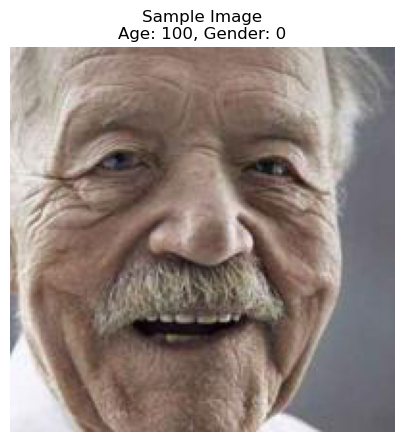

In [33]:
# --- Display a single sample image ---
from PIL import Image
import matplotlib.pyplot as plt
import os

# get the first image path from dataframe
img_path = df['image'][0]

# if image path is only filename, join with base folder
# base_folder = "your_dataset_folder_path"
# img_path = os.path.join(base_folder, img_path)

# open and show image
img = Image.open(img_path)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title(f"Sample Image\nAge: {df['age'][0]}, Gender: {df['gender'][0]}")
plt.show()


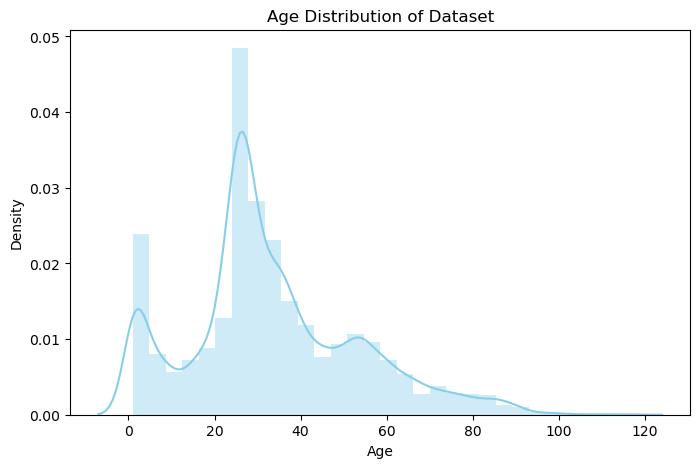

In [35]:
# --- Plot the distribution of age ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.distplot(df['age'], bins=30, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Dataset')
plt.show()


In [45]:
print(df.shape)
print(df.columns)
print(df.head())


(23708, 3)
Index(['image', 'age', 'gender'], dtype='object')
                                               image  age gender
0  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100    NaN
1  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100    NaN
2  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100    NaN
3  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100    NaN
4  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100    NaN


In [46]:
import os
import cv2
import pandas as pd

path = r"C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UTKFace"

ages = []
genders = []
image_paths = []

for filename in os.listdir(path):
    try:
        age, gender, _ = filename.split("_")[0:3]
        img_path = os.path.join(path, filename)
        image_paths.append(img_path)
        ages.append(int(age))
        genders.append(int(gender))
    except:
        continue

df = pd.DataFrame({
    'image': image_paths,
    'age': ages,
    'gender': genders
})

print(df.head())
print(df.shape)


                                               image  age  gender
0  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       0
1  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       0
2  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       1
3  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       1
4  C:\Users\JYOTI_BEHERA\Downloads\archive (6)\UT...  100       1
(23708, 3)


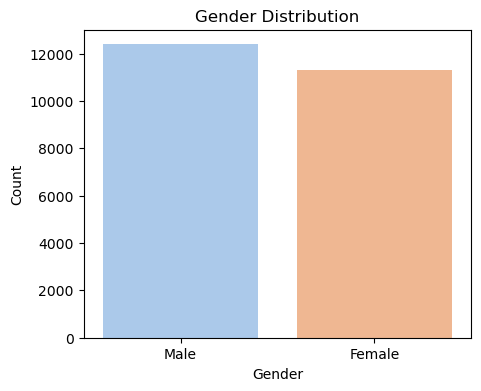

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

df['gender'] = df['gender'].map({0: 'Male', 1: 'Female'})

plt.figure(figsize=(5,4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


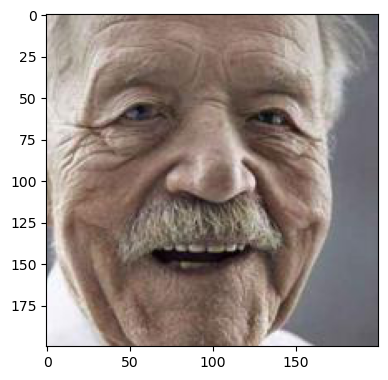

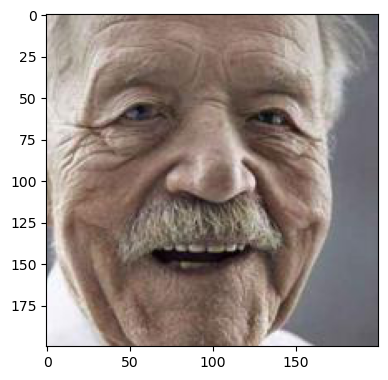

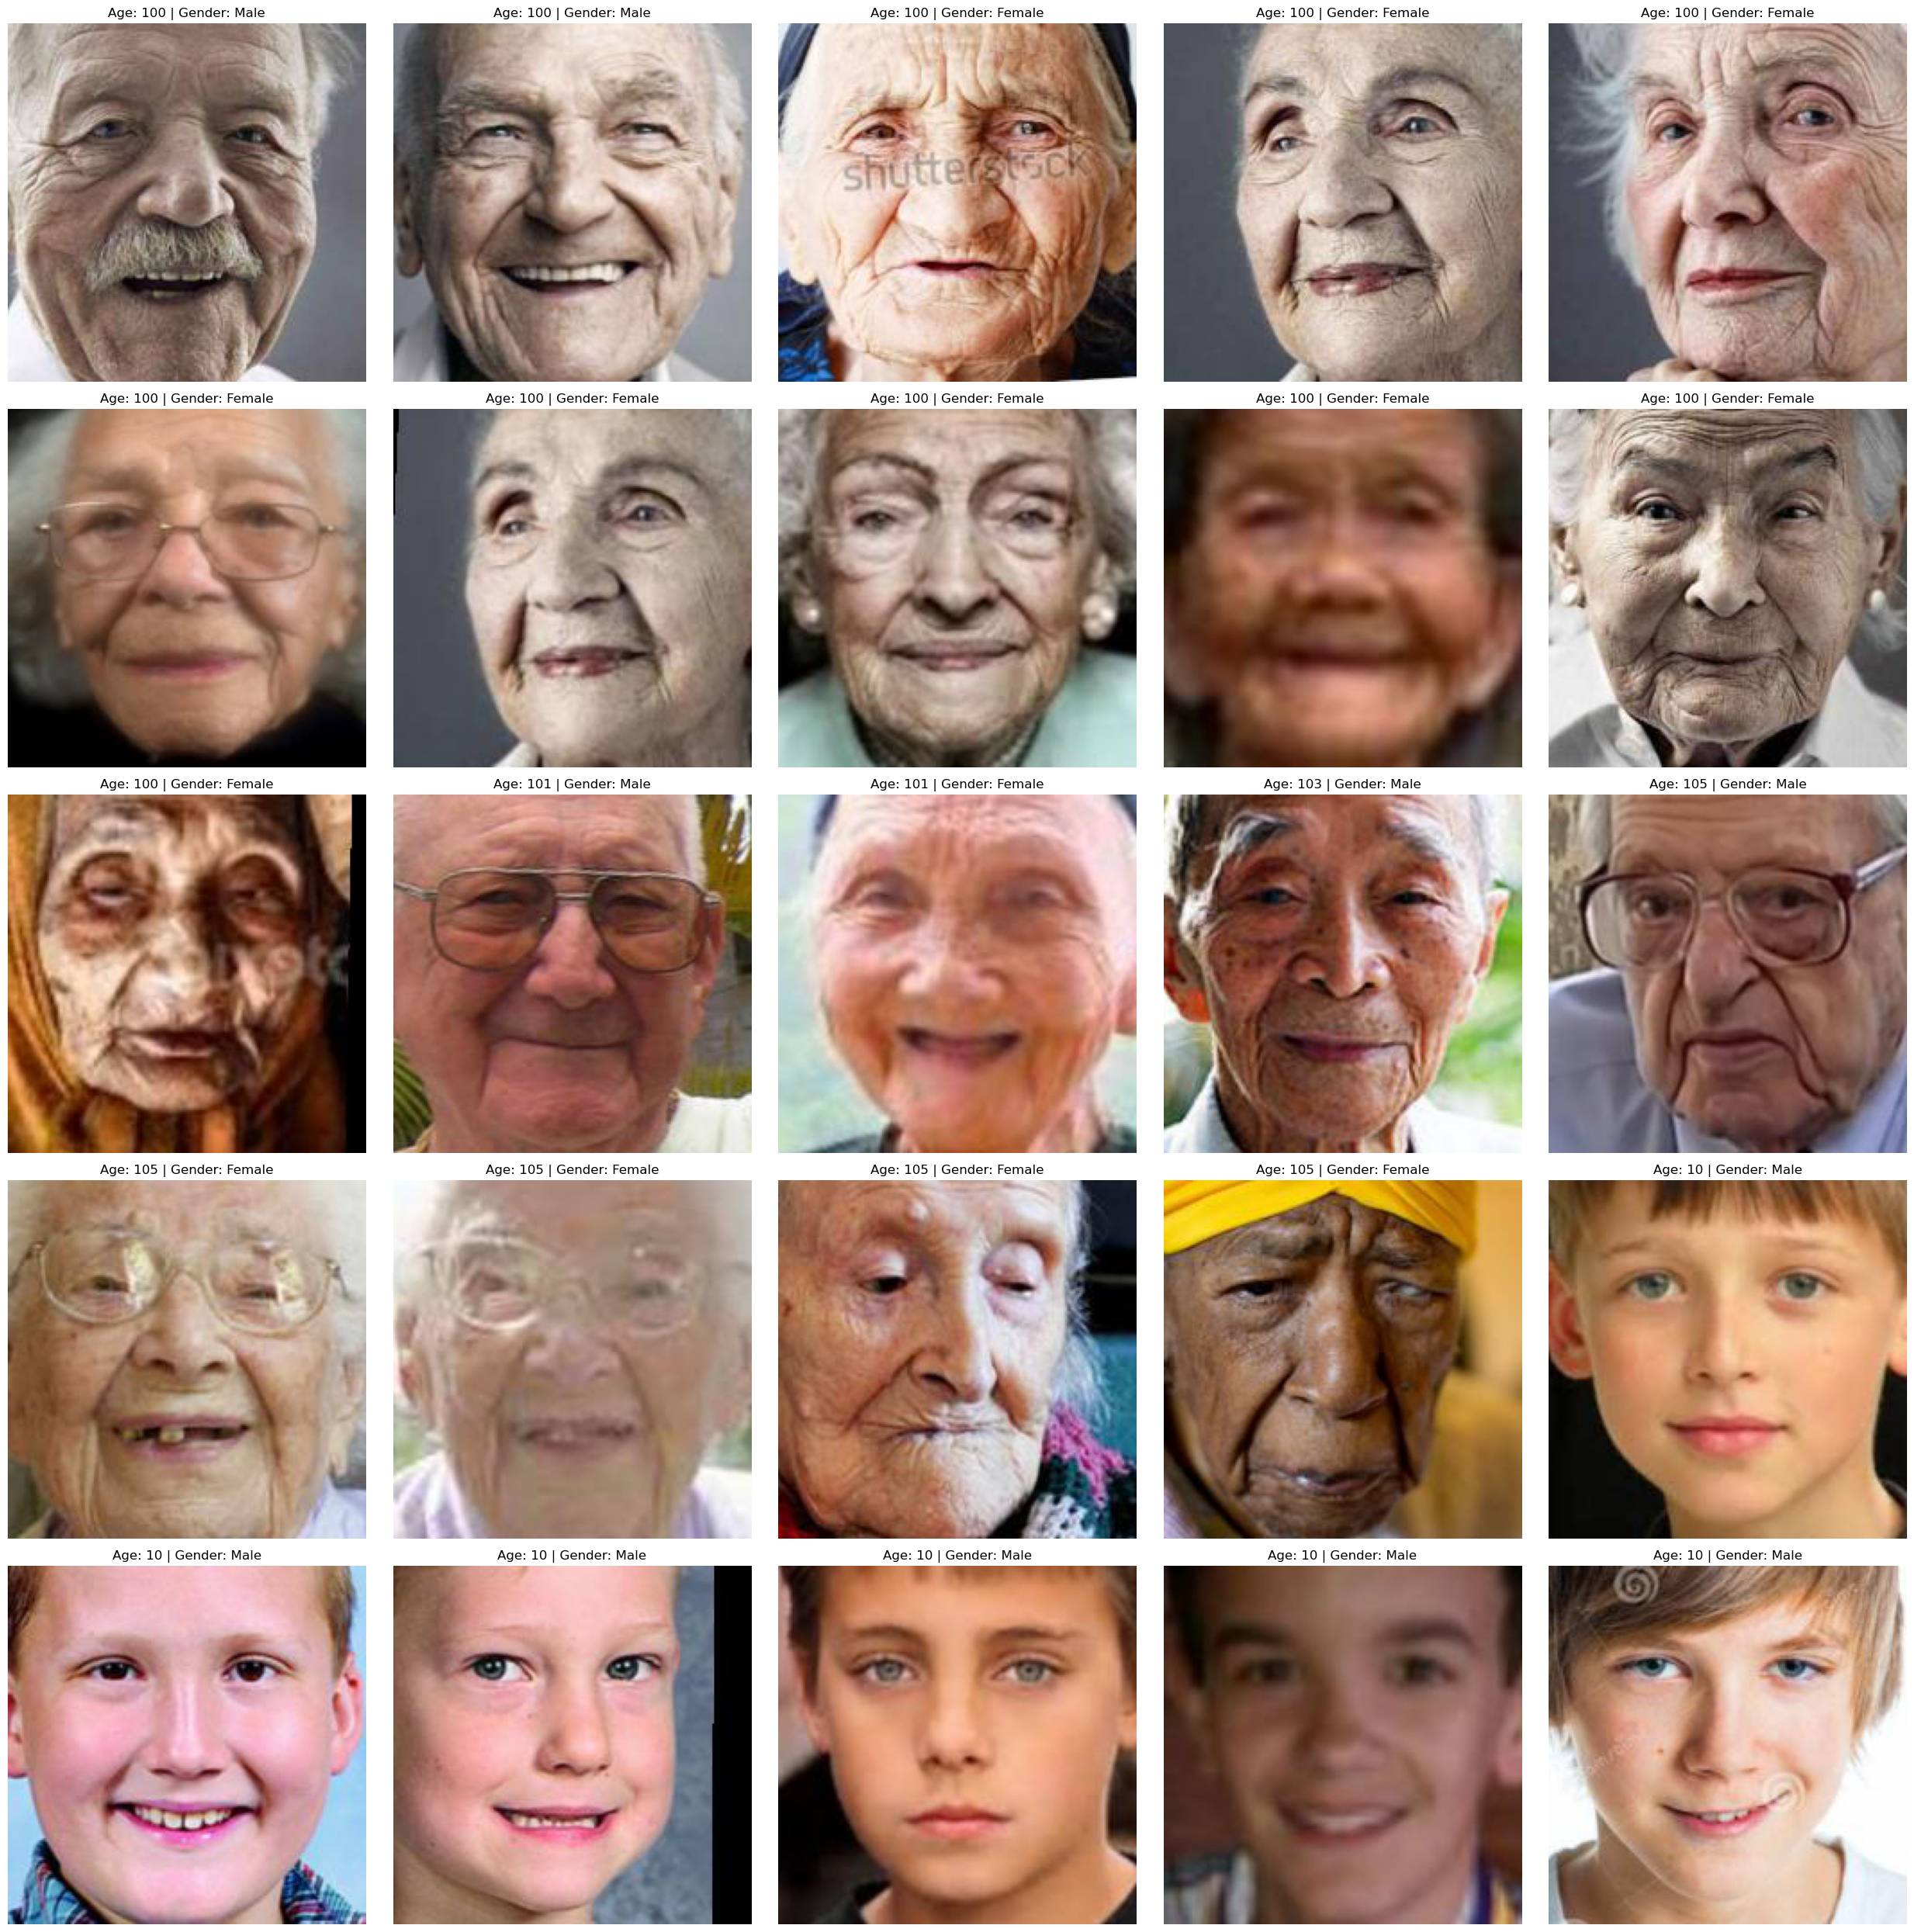

In [50]:
plt.figure(figsize=(25,25))
files = df.iloc[:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} | Gender: {gender}")  # fixed here
    plt.axis('off')

plt.tight_layout()
plt.show()


In [53]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import Image

In [54]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')   # ✅ fixed line
        img = img.resize((128,128), Image.LANCZOS)      # ✅ updated ANTI_ALIAS to LANCZOS (new name)
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [58]:
X = extract_features(df['image'])

100%|███████████████████████████████████████████████████████████████████████████| 23708/23708 [00:55<00:00, 425.12it/s]


In [59]:
X.shape

(23708, 128, 128, 1)

In [60]:
#normalizes the images
X=X/255.0

In [61]:
y_gender=np.array(df['gender'])
y_age=np.array(df['age'])


In [62]:
input_shape=(128,128,1)

In [67]:
# model creation
inputs=Input((input_shape))
conv_1=Conv2D(32,kernel_size=(3,3),activation='relu')(inputs)
maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2=Conv2D(32,kernel_size=(3,3),activation='relu')(maxp_1)
maxp_2=MaxPooling2D(pool_size=(2,2))(conv_1)
conv_3=Conv2D(32,kernel_size=(3,3),activation='relu')(maxp_2)
maxp_3=MaxPooling2D(pool_size=(2,2))(conv_1)
conv_4=Conv2D(32,kernel_size=(3,3),activation='relu')(maxp_3)
maxp_4=MaxPooling2D(pool_size=(2,2))(conv_1)

flatten=Flatten() (maxp_4)

# fully connected layers
dense_1=Dense(256,activation='relu') (flatten)
dense_2=Dense(256,activation='relu') (flatten)

dropout_1=Dropout(0.3) (dense_1)
dropout_2=Dropout(0.3)(dense_2)

output_1=Dense(1,activation='sigmoid',name='gender_out') (dropout_1)
output_2=Dense(1,activation='relu',name='age_out') (dropout_2)

model=Model(inputs=[inputs],outputs=[output_1,output_2])

model.compile(loss=['binary_crossentrophy','mae'],optimizer='adam',metrics=['accuracy'])

In [68]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_12 (Conv2D)            │ (None, 126, 126, 32)      │             320 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_14              │ (None, 63, 63, 32)        │               0 │ conv2d_12[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 127008)            │               0 │ max_pooling2d_14[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 256)               │      32,514,304 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 256)               │      32,514,304 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256)               │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 256)               │               0 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gender_out (Dense)            │ (None, 1)                 │             257 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ age_out (Dense)               │ (None, 1)                 │             257 │ dropout_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 65,029,442 (248.07 MB)

 Trainable params: 65,029,442 (248.07 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.output_names


ListWrapper(['gender_out', 'age_out'])

In [95]:
import numpy as np

X_dummy = np.random.rand(50, 128, 128, 1)
y_gender_dummy = np.random.randint(0, 2, 50)
y_age_dummy = np.random.randint(18, 60, 50)

history = model.fit(
    X_dummy, [y_gender_dummy, y_age_dummy],
    batch_size=16,
    epochs=3,
    validation_split=0.2,
    verbose=1
)


Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - age_out_loss: 1946.1136 - age_out_mae: 42.0005 - gender_out_accuracy: 0.5500 - gender_out_loss: 9.1086 - loss: 2304.1233 - val_age_out_loss: 877.6375 - val_age_out_mae: 27.0163 - val_gender_out_accuracy: 0.5000 - val_gender_out_loss: 13.1985 - val_loss: 890.8361
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - age_out_loss: 790.1966 - age_out_mae: 26.6918 - gender_out_accuracy: 0.4750 - gender_out_loss: 7.4578 - loss: 847.7531 - val_age_out_loss: 148.4250 - val_age_out_mae: 9.3359 - val_gender_out_accuracy: 0.4000 - val_gender_out_loss: 0.6980 - val_loss: 149.1230
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - age_out_loss: 286.2421 - age_out_mae: 13.1559 - gender_out_accuracy: 0.5000 - gender_out_loss: 3.1627 - loss: 256.8195 - val_age_out_loss: 439.6656 - val_age_out_mae: 17.5578 - val_gender_out_accuracy: 0.5000 - val_gender_out_loss: 3.9981 - val_loss: 443.6636


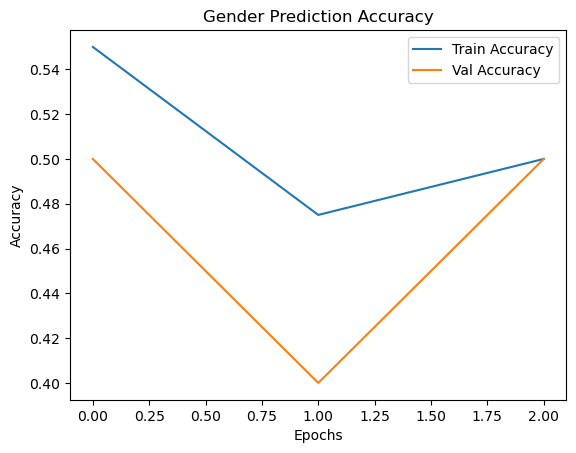

In [96]:
#Plot gender accuracy
plt.plot(history.history['gender_out_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_gender_out_accuracy'], label='Val Accuracy')
plt.title('Gender Prediction Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

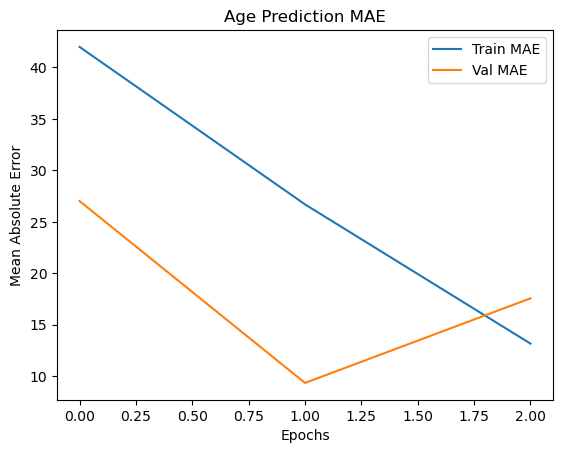

In [97]:
plt.plot(history.history['age_out_mae'], label='Train MAE')
plt.plot(history.history['val_age_out_mae'], label='Val MAE')
plt.title('Age Prediction MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()